In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from nltk import corpus
from google_trans_new import google_translator

import nltk
nltk.download("punkt")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erene\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
def generate_ngrams(s, n):
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[token[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [4]:
url = "https://hundred.org/en/collections/hundred-2021"

response = requests.get(url)
headers = response.headers
body = response.text


In [5]:
soup = BeautifulSoup(body, "html.parser")
mainLink= "https://hundred.org/"
links = []
for link in soup.findAll('a', attrs={'href': re.compile("/en/innovations/")}):
        links.append(link.get('href'))

links= list(set(links))
print(links)
print(len(links))

['/en/innovations/squawk-squad-global-change-environmental-education-platform', '/en/innovations/dignitas-project', '/en/innovations/stir-education', '/en/innovations/mymachine', '/en/innovations/design-for-change', '/en/innovations/amala', '/en/innovations/project-defy-design-education-for-yourself', '/en/innovations/global-oneness-project', '/en/innovations/kide-science', '/en/innovations/8-slam-out-loud', '/en/innovations/6-city-wanderer-wandering-challenge', '/en/innovations/project-rockit-online', '/en/innovations/coschool', '/en/innovations/scratch', '/en/innovations/cell-ed-school-life-and-work-readiness-mobile-platform', '/en/innovations/cybersmart-africa', '/en/innovations/meetoo', '/en/innovations/immerseme-co', '/en/innovations/brac-remote-play-labs', '/en/innovations/green-bronx-machine', '/en/innovations/kolibri', '/en/innovations/creating-together-by-kids-to-kids', '/en/innovations/lab4u-fcd26f47-a9b2-45db-ba29-d7b6f51e79c9', '/en/innovations/geek-teachers', '/en/innovati

In [6]:
url = "https://hundred.org/en/collections/hundred-2022"

response = requests.get(url)
headers = response.headers
body = response.text


In [7]:
links2 = []
for link in soup.findAll('a', attrs={'href': re.compile("/en/innovations/")}):
        links2.append(link.get('href'))

links2= list(set(links2))
print(links2)
print(len(links2))

['/en/innovations/squawk-squad-global-change-environmental-education-platform', '/en/innovations/dignitas-project', '/en/innovations/stir-education', '/en/innovations/mymachine', '/en/innovations/design-for-change', '/en/innovations/amala', '/en/innovations/project-defy-design-education-for-yourself', '/en/innovations/global-oneness-project', '/en/innovations/kide-science', '/en/innovations/8-slam-out-loud', '/en/innovations/6-city-wanderer-wandering-challenge', '/en/innovations/project-rockit-online', '/en/innovations/coschool', '/en/innovations/scratch', '/en/innovations/cell-ed-school-life-and-work-readiness-mobile-platform', '/en/innovations/cybersmart-africa', '/en/innovations/meetoo', '/en/innovations/immerseme-co', '/en/innovations/brac-remote-play-labs', '/en/innovations/green-bronx-machine', '/en/innovations/kolibri', '/en/innovations/creating-together-by-kids-to-kids', '/en/innovations/lab4u-fcd26f47-a9b2-45db-ba29-d7b6f51e79c9', '/en/innovations/geek-teachers', '/en/innovati

In [8]:
links = links + links2
print(len(links))

200


In [9]:
print(links)

['/en/innovations/squawk-squad-global-change-environmental-education-platform', '/en/innovations/dignitas-project', '/en/innovations/stir-education', '/en/innovations/mymachine', '/en/innovations/design-for-change', '/en/innovations/amala', '/en/innovations/project-defy-design-education-for-yourself', '/en/innovations/global-oneness-project', '/en/innovations/kide-science', '/en/innovations/8-slam-out-loud', '/en/innovations/6-city-wanderer-wandering-challenge', '/en/innovations/project-rockit-online', '/en/innovations/coschool', '/en/innovations/scratch', '/en/innovations/cell-ed-school-life-and-work-readiness-mobile-platform', '/en/innovations/cybersmart-africa', '/en/innovations/meetoo', '/en/innovations/immerseme-co', '/en/innovations/brac-remote-play-labs', '/en/innovations/green-bronx-machine', '/en/innovations/kolibri', '/en/innovations/creating-together-by-kids-to-kids', '/en/innovations/lab4u-fcd26f47-a9b2-45db-ba29-d7b6f51e79c9', '/en/innovations/geek-teachers', '/en/innovati

In [10]:
websiteLinks = list()
for element in links:
        url = mainLink + element
        response = requests.get(url)
        if(response.status_code == 200):
                headers = response.headers
                body = response.text
                soup = BeautifulSoup(body, "html.parser")
                for link in soup.find_all('a', class_="contact-icon www"):
                        websiteLinks.append(link.get('href'))

print(websiteLinks)

['https://www.education.squawksquad.co.nz/', 'https://www.dignitasproject.org', 'https://stireducation.org/', 'http://mymachine-global.org/', 'http://www.dfcworld.com/#', 'https://www.amalaeducation.org', 'http://www.projectdefy.org/', 'https://www.globalonenessproject.org/', 'https://kidescience.com', 'https://www.slamoutloud.com', 'https://www.citywanderer.org', 'https://www.projectrockit.com.au/', 'https://www.coschool.co/', 'https://www.cell-ed.com', 'https://cybersmartafrica.org/', 'https://www.meetoo.help', 'https://immerseme.co/', 'https://www.bracusa.org', 'https://greenbronxmachine.org/', 'https://learningequality.org/kolibri/', 'https://www.bykidstokids.net', 'https://lab4u.co/en/home/', 'https://geekteachers.ru', 'https://otsimo.com/en/', 'https://www.scholasoccurrentes.org/', 'https://www.learntoplay.org', 'https://www.learntoplay.org', 'https://www.dosteducation.com/', 'https://team4tech.org', 'https://www.schoolday.com', 'https://tagtiv8.com/', 'https://profuturo.educatio

In [25]:
translator = google_translator()
df = pd.DataFrame(columns=["Link","Text"])
for link in websiteLinks:
   try:
      url = link
      response = requests.get(url)
      if(response.status_code == 200):
         headers = response.headers
         body = response.text
         soup = BeautifulSoup(body, "html.parser")
         pageText = soup.getText()

         #Replace line breaks with a space to prevent words in different lines from being accdientally concatinated
         pageText = pageText.replace("\n"," ")
         pageText = pageText.replace("."," ")
         pageText = pageText.replace("?"," ")

         #Split page text into sentences
         listOfSentences = nltk.tokenize.sent_tokenize(pageText)
         translatedText = ""
         #Translate each sentence individually
         for sentence in listOfSentences:
            if translator.detect(sentence)[0] != "en":
               translatedText+= " " + translator.translate(sentence, lang_tgt="en") + " "
            else:
               translatedText += sentence
               continue
         
         #Add the link with the translated block of text into the dataframe
         newRow = {"Link" : url,"Text" : translatedText}
         df = df.append(newRow,ignore_index=True)
   except:
      print("Failed to connect to: " + link)
      continue

print(df)
df.to_json("WebsitesAndText.json")

Failed to connect to: https://www.education.squawksquad.co.nz/
Failed to connect to: https://stireducation.org/
Failed to connect to: http://www.dfcworld.com/#
Failed to connect to: https://www.globalonenessproject.org/
Failed to connect to: https://cybersmartafrica.org/
Failed to connect to: https://www.bracusa.org
Failed to connect to: https://learningequality.org/kolibri/
Failed to connect to: https://unidirectory.auckland.ac.nz/profile/j-fenaughty
Failed to connect to: https://reapbenefit.org/
Failed to connect to: https://www.aula42.org
Failed to connect to: http://www.tcgcsys.com/
Failed to connect to: https://greenhopefoundation.com/
Failed to connect to: http://www.robhouben.com
Failed to connect to: https://lco.global/education/partners/
Failed to connect to: http://www.rootsofempathy.org/
Failed to connect to: https://www.edcamp.org
Failed to connect to: http://www.fundacionparaguaya.org.py/v2/?proyecto=escuelas-autosostenibles-en-ingles&lang=en
Failed to connect to: https://

Text Cleaning

In [26]:
df = pd.read_json("WebsitesAndText.json")
allText = ""
for text in df.loc[:,"Text"]:
    allText += text + " "

In [42]:
stopWords = STOPWORDS
stopWords.add("https")
stopWords.add("cookie")
stopWords.add("privacy policy")
stopWords.add("contact us")
wordCloud = WordCloud(stopwords=stopWords, width=800, height=400)
wordCloud.generate(allText.lower())

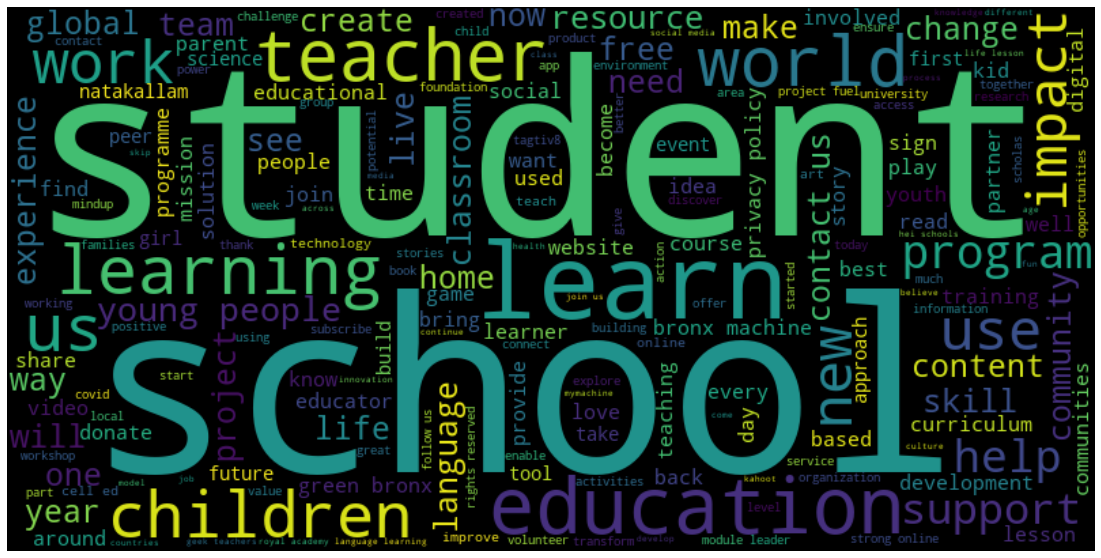

In [43]:
plt.figure(figsize=[20,10])
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
wordCloud.to_file("WordCloud.png")